In [1]:
import amici.plotting
from amici.petab_import import import_petab_problem
import fides
import petab
import pypesto.petab
import pypesto.optimize
import pypesto.visualize
import pypesto.visualize.model_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import benchmark_models_petab
petab_problem = benchmark_models_petab.get_problem("Boehm_JProteomeRes2014")

In [14]:
sbml_missing_papb = petab.models.sbml_model.SbmlModel.from_file("model_Boehm_JProteomeRes2014.xml")
petab_problem.model = sbml_missing_papb

In [17]:
amici_model = import_petab_problem(petab_problem)
# set narrow timepoints
t_ref = np.around(np.arange(0, 240.1, 0.1), decimals=1)
amici_model.setTimepoints(t_ref)
# simulate
solver = amici_model.getSolver()
rdata = amici.runAmiciSimulation(amici_model, solver)

2023-04-26 18:11:36.033 - amici.petab_import - INFO - Importing model ...
2023-04-26 18:11:36.033 - amici.petab_import - INFO - Validating PEtab problem ...
2023-04-26 18:11:36.104 - amici.petab_import - INFO - Model name is 'Boehm_JProteomeRes2014'.
Writing model code to '/home/maren/Documents/SYM/Boehm/step_1/petab_boehm_missing_state/amici_models/Boehm_JProteomeRes2014'.
2023-04-26 18:11:36.105 - amici.petab_import - INFO - Species: 8
2023-04-26 18:11:36.105 - amici.petab_import - INFO - Global parameters: 9
2023-04-26 18:11:36.106 - amici.petab_import - INFO - Reactions: 9
2023-04-26 18:11:36.117 - amici.petab_import - INFO - Observables: 3
2023-04-26 18:11:36.118 - amici.petab_import - INFO - Sigmas: 3
2023-04-26 18:11:36.121 - amici.petab_import - DEBUG - Adding output parameters to model: ['noiseParameter1_pSTAT5A_rel', 'noiseParameter1_pSTAT5B_rel', 'noiseParameter1_rSTAT5A_rel']
2023-04-26 18:11:36.122 - amici.petab_import - DEBUG - Adding initial assignments for []
2023-04-26

running AmiciInstall
Adding OpenMP flags...
hdf5.h found in /usr/include/hdf5/serial
libhdf5.a found in /usr/lib/x86_64-linux-gnu/hdf5/serial
running build_ext
Changed extra_compile_args for unix to ['-fopenmp', '-std=c++14']
Building model extension in /home/maren/Documents/SYM/Boehm/step_1/petab_boehm_missing_state/amici_models/Boehm_JProteomeRes2014
building 'Boehm_JProteomeRes2014._Boehm_JProteomeRes2014' extension
Testing SWIG executable swig4.0... SUCCEEDED.
swigging swig/Boehm_JProteomeRes2014.i to swig/Boehm_JProteomeRes2014_wrap.cpp
swig4.0 -python -c++ -modern -outdir Boehm_JProteomeRes2014 -I/home/maren/Documents/SYM/venv/lib/python3.9/site-packages/amici/swig -I/home/maren/Documents/SYM/venv/lib/python3.9/site-packages/amici/include -o swig/Boehm_JProteomeRes2014_wrap.cpp swig/Boehm_JProteomeRes2014.i
Deprecated command line option: -modern. This option is now always on.
creating build
creating build/temp.linux-x86_64-3.9
creating build/temp.linux-x86_64-3.9/swig
x86_64-lin

In [4]:
states_names = [
    "STAT5A",
    "STAT5B",
    # "pApB",
    "pApA",
    "pBpB",
    "nucpApA",
    "nucpApB",
    "nucpBpB",
]
observables_names = ["pSTAT5A_rel", "pSTAT5B_rel", "rSTAT5A_rel"]

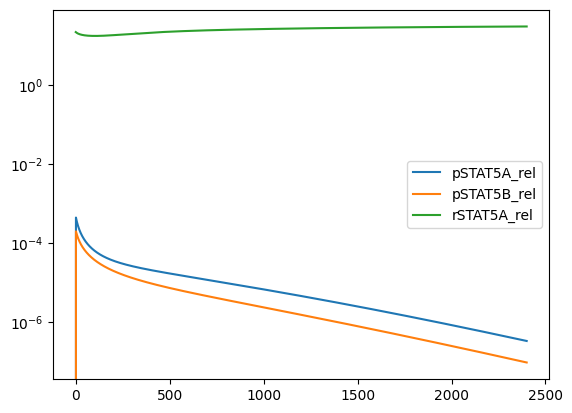

In [18]:
plt.plot(rdata["y"], label=observables_names)
plt.yscale("log")
plt.legend();

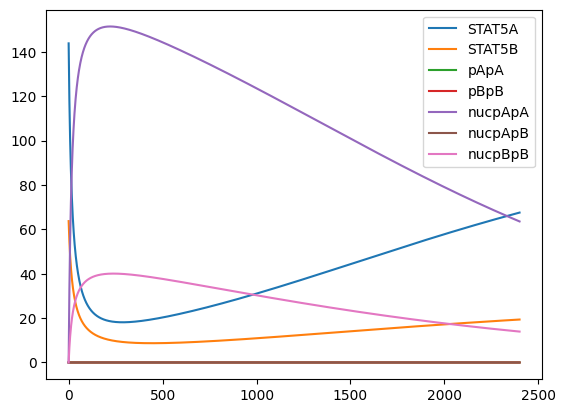

In [19]:
plt.plot(rdata["x"], label=states_names)
plt.legend();